## 1 - Classification in brief

The most common supervised learning tasks are Regression (predicting values i.e quantitative variables) and Classification (predicting classes i.e factors, qualitative variables). In the last notebook, we used Regression models (`LinearRegression`, `DecisionTree`, `RandomForest`). Now we will work on a Classification project.

We will use the MNIST dataset which is a set of 70 000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. Our dependant variable is a qualitative variable with 9 levels --> 1,2,3,4,5,6,7,8,9. The variable may seem quantitative, but it is not. In fact try and imagine these numbers as not really numbers but just "names" or "labels". We could have done the same task but instead of the numbers as labels, we used "one", "two", "three","four"...  
<br/>
So our y/dependant variable is the labels. Our X variables are the pcitures of the handwritten image transformed into vectors. The model we are training will take as input a vector of numbers (that represent the handwritten image) and try to guess what number is written in the image.

### Code to download the MNIST  dataset

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)

In [2]:
# The variable we created "mnist" is a dictionary that has key-values pair; 
mnist.keys() # .keys() gives the keys of dictionaries

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

The datasets that we generally load from sklearn have all the same structure (nearly):
- `data`: A matrix that contains n-columns and m-rows. The columns are the features(variables) and the rows the instances(observations)
- `DESCR`: Describes the data.
- `target`: Contains the labels(dependant variable)

### Create our X and y arrays

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
X.shape # We have 784 features and 70 000 instances. Every handwritten drawing is converted into a vector of 784 numbers.

# In fact, each image is 28 x 28 pixels which is equivalent de 784 features, each one representing 1 pixel's intensity
# from 0(white) to 255(black)

(70000, 784)

In [5]:
y.shape

(70000,)

#### Visualize the handwritten numbers

In order to visualize the numbers, we can represent in a graph the 784 data points and convert them to colours with matplotlib's `imshow` function.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
X = np.array(X) # Transform the pandas data frame into a numpy array to visualize
y = np.array(y)

print(f'The label of the first drawing is {y[0]}.') # What is the label of the drawing we will look at in a moment ?

some_digit = X[0] # we are taking all the features of the observation number 1 (1 is 0 in python)

# iloc is a pandas function that allow to localize using the index.

some_digit_image = some_digit.reshape(28,28) # X[0] is an array, vector of numbers; the real image is a 28 x 28 matrix; so

# we will reshape the vector into the matrix

The label of the first drawing is 5.


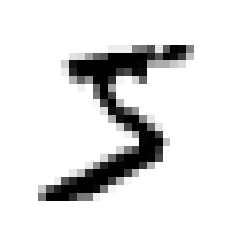

In [8]:
plt.imshow(some_digit_image, cmap = 'binary') # cmap means colour map --> colour map binary is black and white
plt.axis('off') # don't show the axis
plt.show()

We can see the power of python for visualization. With simple line of codes we could see a whole image. Now we know that the observation number 1 (0 in python) represents number 5. The question is now, how to create a machine learning model that will read this array of 784 numbers and decide that these number represent indeed a number 5. Espacially when we consider this is a handwritten number, meaning that there will be variations within the same number when written by different people.

#### Convert the label from string to number

The label column (y) is made of strings. Most ML algorithms love numbers, so let's convert the labels to integers.

In [9]:
y # we can see that the elements of the array are strings

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [10]:
y = y.astype(np.uint8) # convert the type from object to uint8 (integers)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

#### An example of the dataset (and itscomplexity)

<img src="Plot-of-a-Subset-of-Images-from-the-MNIST-Dataset.png" width="600"/>

To conclude this first part of the notebook, classification is really a way of taking input (ex: images of handwritten digits) and **classifying** them into categories (ex: category 1: '1', category 2: '5' ...)

## 2- Training ML models

### Creating a test and training

Of course before any ML project we first need to divide our data in 2 parts: training and testing.

We are lucky because the MNIST dataset is already splitted for us in training and testing sets. The first 60 000 images are for training and the last 10 000 for testing.

In [11]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

### Training a Binary Classifier

Binary Classifiers are classifiers that predict only 2 groups; you are either 1 or 0.  
<br/>
An example of that would be to train a classifier that will only detect the number 5: the "5-detector" classifier.

In [12]:
# Let's create the target vectors
y_train_5 = (y_train == 5) # We will have Tue for all 5 and False if not a 5.
y_test_5 = (y_test == 5)

# A good practice is always to put these conditional statements between parentheses.

#### Stochastic Gradient Descent (SGD-Classifier)

We will pick `SGDClassifier` to start with. This classifier has the advantage of being capable of handling very large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time (which also makes SGD well suited for online learning).

In [13]:
from sklearn.linear_model import SGDClassifier

In [14]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42) # random_state is just so every time we run the notebook we get the same results
sgd_clf.fit(X_train,y_train_5) 

SGDClassifier(random_state=42)

**NB**: `SGDClassifier`relies on randomness during training $\rightarrow$; hence the name Stochastic; stochasticity being the lacking of any predictable order or plan. This is why we used random_state here. 

In [15]:
# Now we can use the classifier to detect the number 5.
sgd_clf.predict([some_digit]) # Remember that some_digit is X[0] that we say is number 5. Let's see if the classifier
# will correctly classify it.

array([ True])

Hurrah ! the classifier correctly classified our handwritten image.

## 3- Performance measure of the model

Now that we have a model, let's measure its performance with cross-valdiation.

In the previous notebook we saw how to use `cross_val_score` that is the very direct and easy way to implement cross validation. Let's try it with 3 folds. 3 folds means dividing the training set in 3 parts and then trying the model 3 times; training it on 2 folds and testing on the 3rd validation fold by changing after each iteration the validation fold; so that all folds are used 1 times as a validation fold.

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

What a beautiful score ! Above 95% of correct answers.

If it is too good to be true...IT IS TOO GOOD TO BE TRUE.  
<br/>
Look at that, we will create a very dumb classifier that will just **class every image as not being 5**. 

In [17]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1), dtype = bool) # Every time the classifier will say FALSE --> not a 5

In [18]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.91125, 0.90855, 0.90915])

Wait.. Wuut ??  
The super dumb classifier that always says not 5 has a 90-91% accuracy. How come ?  
<br/>
Well, in the original dataset we have 9 options (1 to 9). The number of 5s is around 10-11%. Therefore a classifier that only detects 5, if it says not 5 every time,  will only be mistaken around 10% of the trials and the accuracy will be at 90%.

This is an important lesson; it shows that when we deal with skewed data sets (meaning some classes are more frequent then others; like in our case where 90% were False and 10% True), the **accuracy** is not a good performance measure.

#### Advanced cross valdiation

In the previous example we used the very direct and easy `cross_val_score`. However, sometimes we need more control over the cross validation. In these cases, we can adapt cross_val_score to fit our needs.

By default cross_val_score uses `StratifiedKFold`. Other cross validations exist namely `KFold` , `LeaveOneOut`, `ShuffleSplit`, `GroupKFold`.

The idea would be to create a variable called **cv** and then input it in `cross_val_score`.

In [19]:
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, GroupKFold

cv = KFold(5)
cross_val_score(sgd_clf,X_train,y_train_5,cv=cv)

array([0.95316667, 0.96283333, 0.95116667, 0.96691667, 0.96291667])

We won't go into details here, but we just wanted to expose the method so you can use it in your project. You can research these cross-val methods and implement them accordingly if and when needed.

### Confusion matrix

The confusion matrix is very useful and it tells us how many of "A" were classified as "A" and how many as "B". Same for "B".
<br/>
This is a much better way to evaluate the performance of a classifier.

To compute the confusion matrix we first need to have a set of predictions so that they can be compared to the actual targets. We could predict on the test set; but remember, ideally we want to keep the test set for the very end.

In [20]:
from sklearn.model_selection import cross_val_predict

In [21]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

## This function will perform cross validation as before but return the predicted values on the validation sets.
## These are "clean" predictions because model never saw or was trained on the validation sets. 
## If we put together all the predictions made on the validation sets, we get y_pred for all our training data;
##### because every fold (subset) will become for one iteration a validation set.

In [22]:
## Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

Each row in the confusion matrix represent an actual class, while each column represent a predicted class.  
<br/>
The first row of this matrix considers non-5 images (False class) $\rightarrow$ 53892 of them were correctly classified (**True Negatives**) and 687 wrong (**False Positives**).  
<br/>
The second row considers the yes-5 images (True class) $\rightarrow$ 1891 were falsely classified (**False Negatives**) and 3530 were correct (**True Positives**).

**NB**: A perfect prediction would make a confusion matrix with only True Positives and True Negatives. It would have non zeros only on the main diagonal.

#### Accuracy of the positive predictions (Precision)

A measure based on the confusion matrix is the accuracy of the positive predictions called **percision** $\rightarrow$ positive detected / every positive classification

precision = $\frac {TP}{TP + FP}$

#### True positive rate (Recall)

Precision is usually used with the measure of **sensitivity** or **true positive rate** $\rightarrow$ this is the ratio of positive instances that are correctly detected by the classifier $\rightarrow$ positive detected / positive total.

sensitivity = $\frac{TP}{TP+FN}$

In [23]:
# Precision and Recall (also called Sensitivity)

from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [24]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

Now our 5-detector does not look as good as with the 0.96 accuracy !

**Interpretation of scores**:   
- When the model claims the image is a 5, it is correct 84% of the time.  
- The model detects only 65% of the 5.

It is convenient to combine the precision and recall in one metric called the $F_1$ score. In particular if we need a simple way to compare 2 classification models.

This score is the *harmonic mean* of precision and recall. The regular mean treats all values equally, the harmonic mean gives more weight to low values. As a result, a classifier will only get a high $F_1$ score if both recall and precision are high.

F1 = $\frac{2}{\frac{1}{precision} + \frac{1}{recall}}$

In [25]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

This score favors classifiers that have similar precision and recall. This is not always what we want: in some contexts we mostly care about precision and in others about recall.  
<br/>
We can't have it both ways, increasing precision reduces recall and vice versa.  
<br/>
**precision**: When the model claims its positive, it is correct x% of the time.  
**recall**: The model detects x% of the positive.  
<br/>
So we can augment the recall by labeling more observations as positive. It will probably augment the detection of positives but it will reduce the % of correct positives. It will label more of the negatives as positives.

### Precision/Recall trade-off

Precision and recall are inversely related. Lowering recall will increase precision and lowering precision will increase recall.  
Most classification models (like SGDClassifier) will choose a certain threshold value. They will then assign to each instance a value. If the value is lower than the threshold the instance will be classified in one group, and if higher in the other.  
<br/>
Therefore we can change precision and recall by changing the threshold value.

#### Changing the threshold

Scikit-learn does not let us change the threshold directly, but it give us access to the decision scores that are used to make predictions. All we need to do is call the `decision_function()` method instead of `predict()` which returns a score for each instance, and then we can use any threshold we want to make predictions based on those scores.

In [26]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [27]:
threshold = 0 # Specify the threshold
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([ True])

The SGDClassifier uses a threshold equal to 0, so the previous code returns the same result as the `predict()` method. We can do the same with another threshold.

Raising the threshold will decrease the recall. The image we have just classified is a 5 and it was classified correctly. By raising the threshold we can see how this same image will be classified incorrectly.  
<br/>
**raising threshold $\rightarrow$ the model even though some images are in reality 5, will not detect them $\rightarrow$ reduce recall**  
<br/>
**raising threshold $\rightarrow$ when the model will predict 5, it will make less mistakes $\rightarrow$ increase precision**

In [28]:
# Increase the threshold
threshold = 8000 # Specify the threshold
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

How to decide which threshold to use? First we can use `cross_val_predict()` function to get the scores of all instances in the training set but this time specify that we want to return decision scores instead of predictions.

In [29]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = 'decision_function')

Now that we have these scores we can use the `precision_recall_curve()` function to compute precision and recall for all possible thresholds.

In [30]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

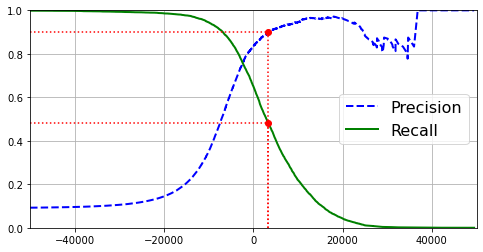

In [31]:
# Finally let's plot the precision and recall as functions of the threshold value

def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--', label = 'Precision', linewidth = 2) #[:-1] because thresholds are 1 value shorter
    plt.plot(thresholds,recalls[:-1],'g-', label = 'Recall', linewidth = 2)
    plt.legend(loc = "center right", fontsize = 16)
    plt.grid()
    plt.axis([-50000,50000,0,1]) # x-axis limit, then y-axis limit

    
# To precisely select a threshold.
## Suppose we want to aim for 90% precision.

threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # np.argmax gives the first index of the maximum value
# in this case the values of precisions >= .90 are True and False. So np.argmax will give the index of the first True value.
# see the cell below for an example of the use of argmax.

# What is the recall of a 90% precision ?
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
    
    
# Plot
plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions,recalls,thresholds) # thresholds is the X axis

# Plot precision and threshold
plt.plot([threshold_90_precision, threshold_90_precision], [0,0.9],'r:') 
plt.plot([-50000,threshold_90_precision],[0.9,0.9],'r:')
plt.plot(threshold_90_precision,0.9,'ro')

# Plot recall and threshold
plt.plot([threshold_90_precision, threshold_90_precision],[0, recall_90_precision],'r:')
plt.plot([-50000,threshold_90_precision],[recall_90_precision,recall_90_precision],'r:')
plt.plot([threshold_90_precision],[recall_90_precision],'ro')

plt.show()


In [32]:
# With booleans
a = np.array([False,False,False,True,True])
print(f'The first True value is at position {np.argmax(a)}.' )

# With numbers
b = np.array([5,4,2,3])
print(f'The highest number is at position {np.argmax(b)}.' )

The first True value is at position 3.
The highest number is at position 0.


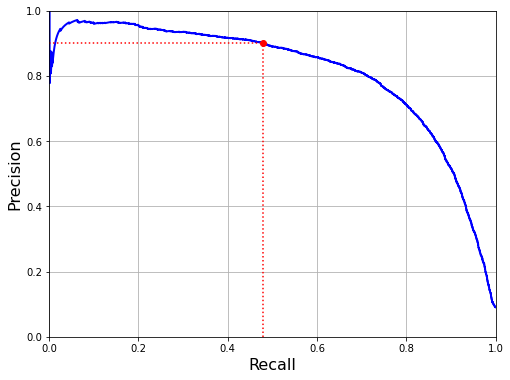

In [33]:
# We can also plot precision vs recall
def plot_precision_vs_recall(precisions,recalls):
    plt.plot(recalls,precisions,'b-',linewidth = 2)
    plt.xlabel('Recall', fontsize = 16)
    plt.ylabel('Precision', fontsize = 16)
    plt.axis([0,1,0,1])
    plt.grid()

plt.figure(figsize = (8,6))
plot_precision_vs_recall(precisions,recalls)

plt.plot([recall_90_precision, recall_90_precision],[0,0.9],'r:')
plt.plot([0,recall_90_precision],[0.9,0.9],'r:')
plt.plot([recall_90_precision],[.9],'ro')
plt.show()

In [34]:
# to make predictions following a certain threshold
y_train_pred_90 = (y_scores >= threshold_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [35]:
# Let's check the precision and recall of these predictions
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [36]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

Now we have a high precision classifier ! It is pretty easy to obtain a classifier with virtually any precision we want: we just set a high enough threshold and we're done !  
<br/>
However, a high precision classifier is not very useful if its recall is too low.  
<br/>
If someone says, "Let's reach a 99% precision", you should ask: "At what recall?".

### The ROC Curve

The *receiver operating characteristic* (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the *true positive rate* (another name for recall) against the *false positive rate* (FPR). The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to 1 minus the *true negative rate* (TNR), which is the ratio of negative instances that are correctly classified as negative. The TNR is also called *specificity*. Hence, the ROC curve plots *sensitivity* (recall) versus 1 minus *specificity*.

In [37]:
# To plot the ROC curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train_5,y_scores) # compute the true positive rate and false positive rate

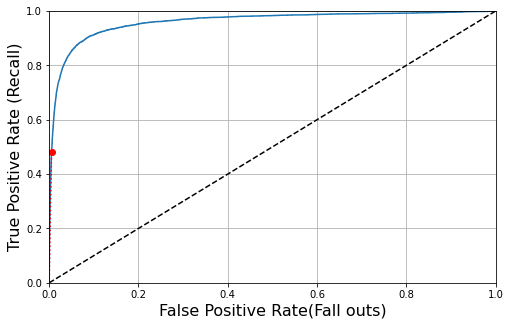

In [38]:
# Now we can plot the FPR against the TPR
def plot_roc_curve(fpr,tpr,label= None):
    plt.plot(fpr,tpr,label = label)
    plt.plot([0,1],[0,1],'k--') # Dashed diagonal
    plt.xlabel('False Positive Rate(Fall outs)', fontsize = 16)
    plt.ylabel('True Positive Rate (Recall)', fontsize = 16)
    plt.axis([0,1,0,1])
    plt.grid()

# We can plot the TPR/FPR point for .9 precision (like before)

fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]

plt.figure(figsize=(8,5))
plot_roc_curve(fpr,tpr)
plt.plot([0,fpr_90],[0,recall_90_precision],'r:')
plt.plot([fpr_90],[recall_90_precision],'ro')

plt.show()

One way to compare classifiers is to measure the *area under the curve* (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

As a rule of thumb you should prefer the Precision Recall curve whenever the positive class is rare or when you care more about the false positives than the false negatives. Otherwise use the ROC curve.

Remember that here we have few 5's and a lot of non-5's therefore the AUC is very high, but this is only because there isn't a lot of 5's. In that case the precision recall curve is more adapted and it shows us that there is room for improvement for our model.

### Random Forest Classifier

We will now train a random forest classifier and compare its ROC curve and ROC AUC score to those of the SGDClassifier. We were used to utilize the `decision_function()` method. But RandomForestClassifier does not have this method. Instead, we will use `predict_proba()` method. Sklearn's classifiers generally have one or both of these methods. The `predict_proba()` method rerturns an array contatining a row per instance and a column per class, each containing the probability that the given instance belongs to that class..

In [40]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = 'predict_proba')

The `roc_curve` function expects labels and scores, but instead of scores we can give it class probabilities. Let's use the positive class's probability as the score.

In [41]:
y_scores_forest = y_probas_forest[:,1] #score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

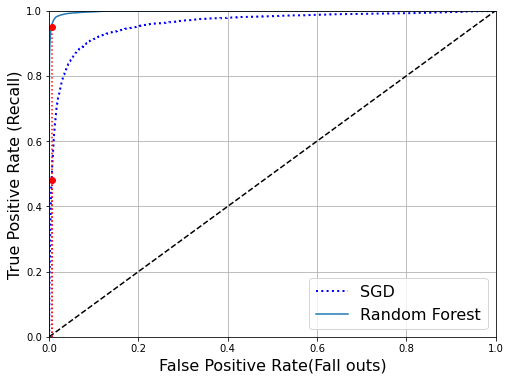

In [42]:
# Plot
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

Comparing ROC curves: the Random Forest Classifier is superior to the SGD classifier because its ROC curve is much closer to the top-left corner and it has a greater AUC.

In [43]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

CONGRATULATIONS !! Now you know how to train and evaluate binary classification models. Let's try to detect more than just the 5's. 

## 4- Multiclass Classification

Multiclass classifiers can distinguish between more than two classes.  
<br/>
**Multiclass algortithms:** Logistic Regression, Random Forest, Naive Bayes...  
**Binary algorithms:** Stochastic Gradient Descent, Support Vector Machine classifiers...

### OvR strategy

One way to create a system that can calssify the digit images into 10 classes for example (0 to 9), is *to train 10 binary classifiers, one for each digit.* Then when we want to classify an image, we get the decision score from each classifier for that image and we select the class whose classifier outputs the highest score. This is the **one versus the rest (OvR)** strategy. (also called **one versus all**).

### OvO strategy

Another strategy is *to train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s and so on.* If there are N classes, you need to train $\frac{N x (N-1)}{2}$ classifiers.  
<br/>
For the MNIST problem, this means training 45 binary classifiers! When we want to classify an image we will need to run the image through all the 45 classifiers and see which class wins the most duels. The main advantage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish. (i.e for 0s and 1s, the algorithm will be trained only on the 0s and 1s of the dataset.)

### In sum

Some algorithms (such as SVM) scale poorly with the size of the training set. For these algorithms OvO is preferred because it is faster to train many classifiers on small training sets than to train few classifiers on large training sets. However for most binary classifiers, OvR is preferred.

### Scikit-Learn

SKlearn detects when you try to use binary classification algorithms for multiclass classification tasks. It automatically runs OvR or OvO depending on the algorithm. Let's try with a **Support Vector Machine Classifier**, `SVC`.

In [44]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train,y_train) # not y_train_5
svm_clf.predict([some_digit]) # It predicted 5 which is correct

array([5], dtype=uint8)

The previous code trains the SVC on the training set using the original target classes from 0 to 9 (y_train) instead of the 5-versus-the-rest target classes (y_train_5). Then it makes a prediction. Under the hood, SKlearn actually used the OvO strategy: it trained 45 binary classifiers, got their decision scores for the image, and selected the class that won the most duels. It trained 45 binary classifiers, got their decision scores for the image, and selected the class that won the most duels.

We can call the `decision_function()` method that will return 10 scores per instance. That's one score (approx the number of won duels plus or a minus a small tweak) per class.

In [46]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [48]:
np.argmax(some_digit_scores)

5

In [52]:
svm_clf.classes_[5]
# It is indeed number 5 !

5

We can force Sklearn to use OvO or OvR by using `OneVsOneClassifier` or `OneVsRestClassifier`. For example if we want to use SVC:

In [53]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train,y_train)
ovr_clf.predict([some_digit])


array([5], dtype=uint8)

Training an SGD multiclass classifier:

In [54]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

This time, Sklearn used and OvR strategy under the hood: since there are 10 classes, it trained 10 binary classifiers. The `decision_function()` method now returns one value per class. Let's look at the score that the SGD classifier assigned to each class:

In [55]:
sgd_clf.decision_functionontionon_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

You can see that the SGD classifier is pretty confident about its prediction: almost all score are largely negative, while class 5 has a score of 2412.5. The model a slight doubt regarding class 3 which gets a score of 573.5. 

### Classifier evaluation

Now we need to evaluate the classifier as we did before. We will start by looking at the accuracy of the classifier.

In [56]:
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.87365, 0.85835, 0.8689 ])

It gets over 84% on all test folds. If you used in this case a random classifier you would get 10% accuracy, so this score is pretty good. But we can still do much better. Simply scaling the inputs increases accuracy above 89%:

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScalerardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = 'accuracy')

array([0.8983, 0.891 , 0.9018])

### Error Analysis

Usually in machine learning projects, we would try multiple models and chose the ones that look promising, tweak their hyperparameters with `GridSearchCV` and automate as much as possible. Let's assume that we have found a promising model and we want to find ways to improve it. One way to do this is to analyze types of errors it makes. 

First look at the confusion matrix. You need to make prediction using `cross_val_predict()` and then call the function `confusion_matrix`.

In [59]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

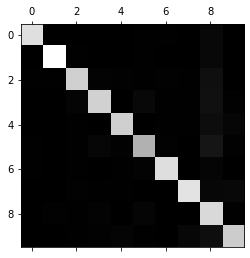

In [60]:
# as you can see there is a lot of numbers, it is often useful to look and an image representation of the confusion matrix
# using Matplotlib's matshow()

plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

The more white-ish colour means a lot of instances were classified here. Ideally we want the main diagonal to be white and the rest black (Very dark). The confusion matrix here looks quite good. The 5s look slightly darkers than the other digits which could mean that there are fewer images of 5s in the dataset or tha the classifier does not perform as weel on 5s as on other digits. In fact, we can verify that both are the case.

Now let's focus on the errors. First we need to divide each value in the confusion matrix by the number of images in the corresponding class so that you can compare error rates instead of absolute numbers of error.

In [61]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums

Fill the diagonal with zeros to keep only the errors and plot the result:

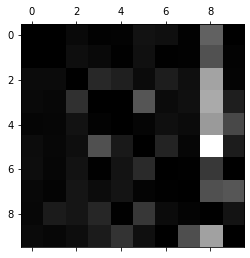

In [62]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)

Now we can clearly see the kinds of errors the classifier makes. **NB:** Rows represent actual classes and column predicted classes.

We can see that the column for class 8 is quite bright which tells us that many images where misclassified as 8s. However, the row for class 8 is not that bad telling us that actual 8s get properly classified.

Looking at this matrix it seems that our efforts should be spent on reducing the false 8s. For example we can gather more data for digits that look like 8s but are not so that the classifier can learn to distinguish them from real 8s. Or we can engineer new features that would help the classifier for example writing an algorithm to count the number of closed loops (8 has 2, 6 has 1, 5 have none..). Or you could preprocess the images to make some patterns such as closed loops stand out more.

## 5 - Conclusion

Other classification tasks exist. **Multilabel Classification** is assigning multiple classes to one instance. This is used in facial recognition algorithms for example. You input an image with many faces on it and the algorithm tells who are the people in the image.

Another task is **Multioutput Classification** and is a generalization of the multilabel calssification where each label can be a multiclass. We won't talk about these two tasks in this project.